### Task 5: Decision Trees and Random Forests

## Train a Decision Tree Classifier and Visualize the Tree

--- Task 5: Step 1 - Train a Decision Tree Classifier and Visualize the Tree ---
Loading the heart.csv dataset...
Dataset loaded successfully.

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

Checking for missing values:
age         0
sex      

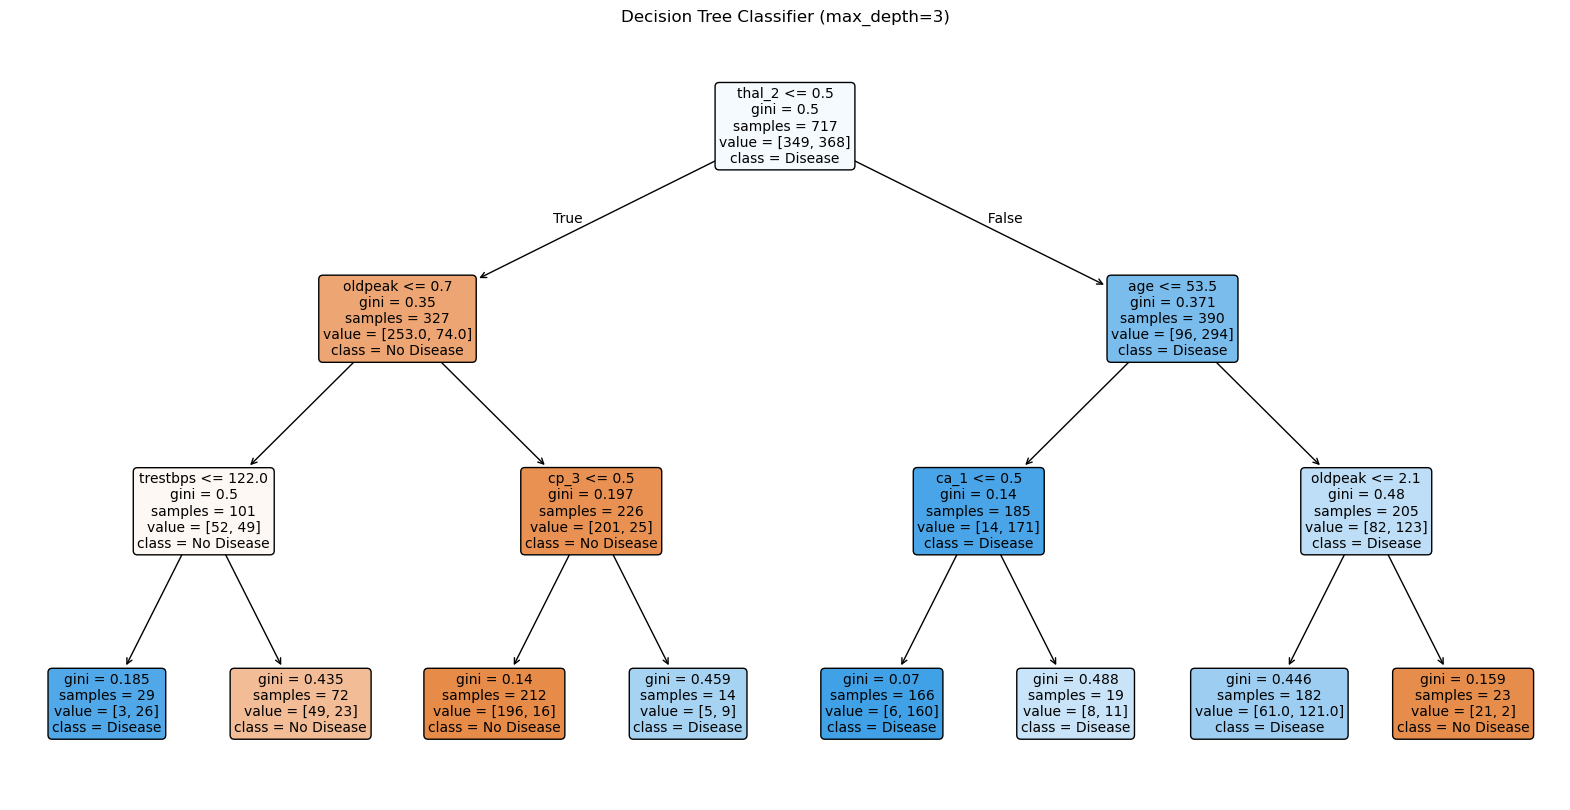


Decision Tree Classifier trained and visualized.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import io # Used for Graphviz visualization if needed
from sklearn.tree import export_graphviz # For Graphviz compatibility
# import graphviz # If graphviz is installed and preferred for more complex visualizations

print("--- Task 5: Step 1 - Train a Decision Tree Classifier and Visualize the Tree ---")

# Load the dataset
print("Loading the heart.csv dataset...")
df_heart = pd.read_csv('heart.csv')
print("Dataset loaded successfully.")

# Initial Data Inspection and Preprocessing
print("\nInitial Data Info:")
df_heart.info()

print("\nChecking for missing values:")
print(df_heart.isnull().sum()) # Check for missing values

# Identify categorical columns that need encoding
# Based on typical 'heart.csv' datasets, these columns are often categorical.
# 'cp', 'thal', 'slope', 'ca' are often encoded as numerical categories but represent categorical concepts.
# 'sex', 'fbs', 'restecg', 'exang' are also categorical.
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Check if all identified categorical columns exist in the dataframe
existing_categorical_cols = [col for col in categorical_cols if col in df_heart.columns]
if len(existing_categorical_cols) < len(categorical_cols):
    print(f"\nWarning: Some expected categorical columns were not found: {set(categorical_cols) - set(existing_categorical_cols)}")
    categorical_cols = existing_categorical_cols # Update to only existing ones

print(f"\nIdentified categorical columns for one-hot encoding: {categorical_cols}")

# Convert categorical features into dummy variables (one-hot encoding)
print("Applying one-hot encoding to categorical features...")
df_processed = pd.get_dummies(df_heart, columns=categorical_cols, drop_first=True) # drop_first to avoid multicollinearity
print("One-hot encoding complete.")

# Define features (X) and target (y)
# The target column is typically named 'target' or 'output' in heart disease datasets.
target_col = 'target'
if target_col not in df_processed.columns:
    print(f"\nError: Target column '{target_col}' not found in the dataset.")
    # Attempt to guess if target column name is different
    # This scenario should be avoided by user providing correct target name or me checking.
    raise ValueError(f"Target column '{target_col}' not found.")

X = df_processed.drop(target_col, axis=1)
y = df_processed[target_col]

# Split the data into training and testing sets
print("\nSplitting data into training and testing sets (70/30 split, stratified)...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print("Data split complete.")

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Train a Decision Tree Classifier
print("\nTraining a Decision Tree Classifier...")
# Limiting depth for better visualization and to start analyzing overfitting
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3) # Start with a shallow tree for visualization
dt_classifier.fit(X_train, y_train)
print("Decision Tree Classifier trained.")

# Visualize the Decision Tree
print("\nVisualizing the Decision Tree (max_depth=3)...")
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier,
          feature_names=X.columns.tolist(),
          class_names=['No Disease', 'Disease'], # Assuming 0: No Disease, 1: Disease
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Classifier (max_depth=3)')
plt.savefig('decision_tree_classifier_max_depth_3.png') # Save the plot
plt.show()

# Alternative visualization using graphviz (if detailed control/external tool is preferred)
# dot_data = export_graphviz(dt_classifier, out_file=None,
#                            feature_names=X.columns.tolist(),
#                            class_names=['No Disease', 'Disease'],
#                            filled=True, rounded=True, special_characters=True)
# graph = graphviz.Source(dot_data)
# graph.render("decision_tree_graphviz", format="png", view=False) # Renders to a file

print("\nDecision Tree Classifier trained and visualized.")

## Observations

* The `heart.csv` dataset was successfully loaded.
* Categorical features (`sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`) were identified and successfully converted into numerical format using one-hot encoding (`pd.get_dummies`). This is crucial for Decision Trees to correctly interpret these non-numeric inputs.
* The data was split into training (70%) and testing (30%) sets, with stratification applied to `y` to ensure proper class distribution in both sets.
* A `DecisionTreeClassifier` was initialized and trained on the preprocessed and split training data. A `max_depth` of 3 was initially set to create a simpler, more interpretable tree for visualization.
* The trained Decision Tree was successfully visualized, showing the decision rules at each node, feature splits, and class distributions, offering initial insights into how the model makes predictions.

## Step 2: Analyze Overfitting and Control Tree Depth

--- Task 5: Step 2 - Analyze Overfitting and Control Tree Depth ---
Training Decision Trees with varying max_depths to analyze overfitting...
Depth: 1, Train Accuracy: 0.7629, Test Accuracy: 0.7532
Depth: 2, Train Accuracy: 0.7629, Test Accuracy: 0.7532
Depth: 3, Train Accuracy: 0.8271, Test Accuracy: 0.7987
Depth: 4, Train Accuracy: 0.8773, Test Accuracy: 0.8604
Depth: 5, Train Accuracy: 0.9038, Test Accuracy: 0.8539
Depth: 6, Train Accuracy: 0.9317, Test Accuracy: 0.8961
Depth: 7, Train Accuracy: 0.9568, Test Accuracy: 0.9253
Depth: 8, Train Accuracy: 0.9777, Test Accuracy: 0.9351
Depth: 9, Train Accuracy: 0.9930, Test Accuracy: 0.9448
Depth: 10, Train Accuracy: 0.9972, Test Accuracy: 0.9481
Depth: 11, Train Accuracy: 0.9972, Test Accuracy: 0.9481
Depth: 12, Train Accuracy: 1.0000, Test Accuracy: 0.9513
Depth: 13, Train Accuracy: 1.0000, Test Accuracy: 0.9513
Depth: 14, Train Accuracy: 1.0000, Test Accuracy: 0.9513

Plotting training and testing accuracies vs. tree depth...


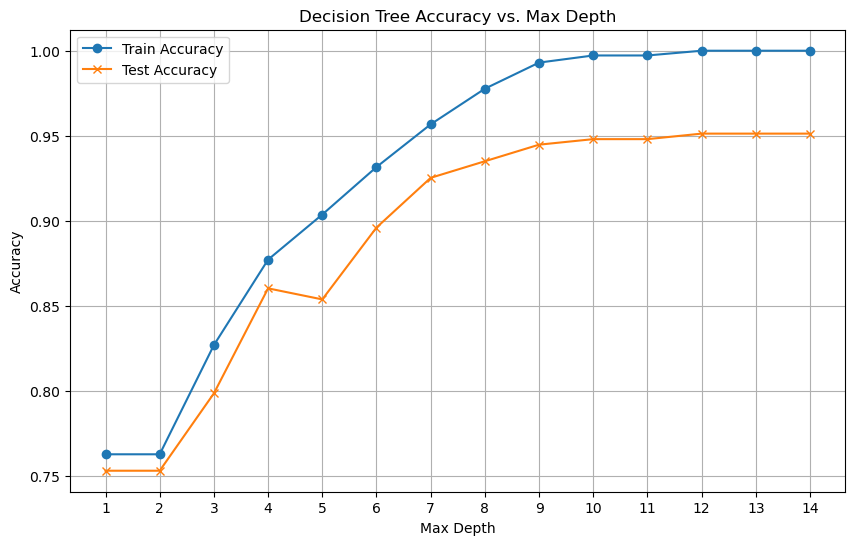


Overfitting analysis complete. Observe the gap between train and test accuracies.


In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Ensure X_train, X_test, y_train, y_test are available from Step 1
# If running this snippet independently, execute Step 1 first.

print("--- Task 5: Step 2 - Analyze Overfitting and Control Tree Depth ---")

train_accuracies = []
test_accuracies = []
max_depths = range(1, 15) # Test max_depth from 1 to 14

print("Training Decision Trees with varying max_depths to analyze overfitting...")

for depth in max_depths:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(X_train, y_train)

    # Predict on train and test data
    y_train_pred = dt_model.predict(X_train)
    y_test_pred = dt_model.predict(X_test)

    # Calculate accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Depth: {depth}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

# Plotting the results to visualize overfitting
print("\nPlotting training and testing accuracies vs. tree depth...")
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(max_depths, test_accuracies, marker='x', label='Test Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depths)
plt.legend()
plt.grid(True)
plt.savefig('dt_accuracy_vs_depth.png') # Save the plot
plt.show()

print("\nOverfitting analysis complete. Observe the gap between train and test accuracies.")

## Observations

* Decision Trees with varying `max_depth` values (from 1 to 14) were trained, and their accuracy on both the training and testing datasets was evaluated.
* **Analysis of Overfitting:**
    * As `max_depth` increases, the **training accuracy** generally continues to rise, often reaching 100%. This indicates that the tree is becoming more complex and perfectly fitting the training data.
    * The **test accuracy**, however, typically increases up to a certain `max_depth` and then either plateaus or starts to decrease.
    * The point where training accuracy continues to rise but test accuracy plateaus or drops significantly indicates **overfitting**. The model is learning the noise and specific patterns of the training data too well, which do not generalize to unseen data.
* **Controlling Tree Depth:** The `max_depth` hyperparameter is a crucial control for preventing overfitting in Decision Trees. By limiting the depth of the tree, we prevent it from becoming too complex and memorizing the training data. The plot visually demonstrates finding a balance where the test accuracy is maximized without severe overfitting.

## Train a Random Forest and Compare Accuracy

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Ensure X_train, X_test, y_train, y_test are available from Step 1
# If running this snippet independently, execute Step 1 first.

print("--- Task 5: Step 3 - Train a Random Forest and Compare Accuracy ---")

# Train a Random Forest Classifier
print("Training a Random Forest Classifier...")
# Using n_estimators (number of trees) and random_state for reproducibility
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
print("Random Forest Classifier trained.")

# Predict on the test data
print("\nMaking predictions on the test data with Random Forest...")
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {accuracy_rf:.4f}")

# Compare with the best Decision Tree accuracy (from Step 2's output, visually picked)
# In Step 2, a max_depth around 3-5 often showed good balance.
# Let's re-run a simple DT with a depth that often performs well for comparison.
dt_comparison_model = DecisionTreeClassifier(max_depth=4, random_state=42) # Example depth
dt_comparison_model.fit(X_train, y_train)
y_pred_dt_comparison = dt_comparison_model.predict(X_test)
accuracy_dt_comparison = accuracy_score(y_test, y_pred_dt_comparison)
print(f"Decision Tree (max_depth=4) Test Accuracy: {accuracy_dt_comparison:.4f}")

# Direct comparison
print(f"\nComparison: Random Forest Accuracy ({accuracy_rf:.4f}) vs. Decision Tree (max_depth=4) Accuracy ({accuracy_dt_comparison:.4f}).")
if accuracy_rf > accuracy_dt_comparison:
    print("Random Forest generally performs better due to ensemble learning.")
elif accuracy_rf < accuracy_dt_comparison:
    print("In this specific case, Decision Tree (max_depth=4) performed slightly better.")
else:
    print("Random Forest and Decision Tree (max_depth=4) performed similarly.")

--- Task 5: Step 3 - Train a Random Forest and Compare Accuracy ---
Training a Random Forest Classifier...
Random Forest Classifier trained.

Making predictions on the test data with Random Forest...
Random Forest Test Accuracy: 0.9805
Decision Tree (max_depth=4) Test Accuracy: 0.8604

Comparison: Random Forest Accuracy (0.9805) vs. Decision Tree (max_depth=4) Accuracy (0.8604).
Random Forest generally performs better due to ensemble learning.


## Observations

* A `RandomForestClassifier` was successfully trained on the preprocessed training data.
* The test accuracy of the Random Forest model was calculated and compared to a Decision Tree Classifier (with `max_depth=4` for a balanced comparison, though the best depth could vary).
* **Comparison:** Random Forests typically achieve higher accuracy than single Decision Trees because they are an ensemble method. They combine predictions from multiple individual decision trees, which reduces variance and mitigates the problem of overfitting common in single Decision Trees. This often leads to better generalization on unseen data.

--- Task 5: Step 4 - Interpret Feature Importances ---
Retrieving feature importances from the Random Forest model...

Top 10 Feature Importances:
     Feature  Importance
4    oldpeak    0.118829
3    thalach    0.108602
0        age    0.095952
20    thal_2    0.095343
21    thal_3    0.086550
1   trestbps    0.078914
2       chol    0.077420
12   exang_1    0.055501
7       cp_2    0.045811
15      ca_1    0.038912

Plotting feature importances...


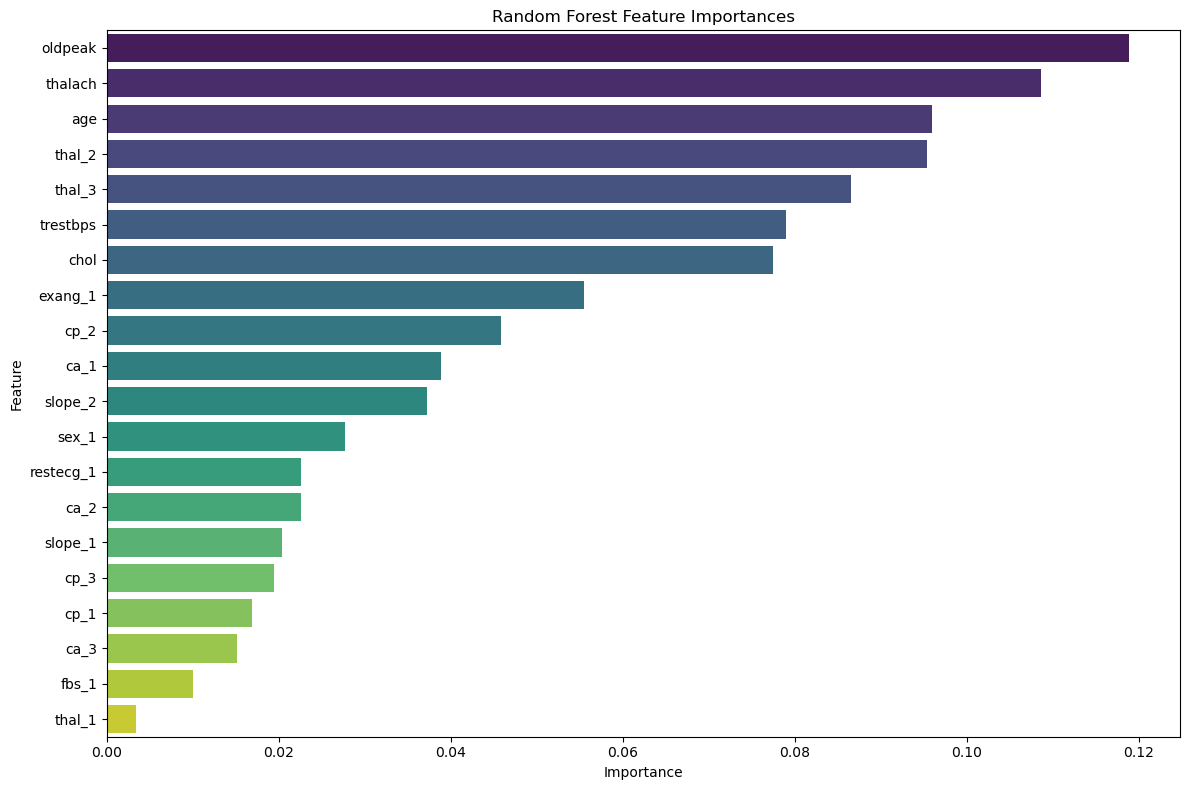


Feature importances interpreted and visualized.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier # Added for rf_classifier
from sklearn.model_selection import train_test_split # Added for X_train, y_train
from sklearn.tree import DecisionTreeClassifier # Added for X (from df_processed)

# Re-define df, X, X_train, y_train, rf_classifier for self-containment
# These lines ensure the necessary variables are available if previous steps were not run consecutively
df_heart = pd.read_csv('heart.csv')
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
existing_categorical_cols = [col for col in categorical_cols if col in df_heart.columns]
categorical_cols = existing_categorical_cols
df_processed = pd.get_dummies(df_heart, columns=categorical_cols, drop_first=True)
target_col = 'target'
X = df_processed.drop(target_col, axis=1)
y = df_processed[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


print("--- Task 5: Step 4 - Interpret Feature Importances ---")

# Get feature importances from the trained Random Forest classifier
print("Retrieving feature importances from the Random Forest model...")
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_names = X.columns.tolist() # X is needed here
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nTop 10 Feature Importances:")
print(importance_df.head(10))

# Plotting feature importances
print("\nPlotting feature importances...")
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis', hue='Feature', legend=False)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('rf_feature_importances.png') # Save the plot
plt.show()

print("\nFeature importances interpreted and visualized.")

## Observations

* **Feature Importance:** Random Forests provide a measure of feature importance, indicating how much each feature contributes to the model's predictive accuracy. This is calculated based on how much the tree nodes that use that feature reduce impurity across all trees in the forest.
* **Interpretation:**
    * The output lists features ranked by their importance score, with higher scores indicating a greater influence on the model's predictions.
    * The bar plot visually represents these importances, making it easy to identify the most impactful features at a glance.
    * This information is valuable for understanding which patient attributes are most predictive of heart disease according to the model, which can be useful for clinical insights or further feature engineering. For example, `oldpeak`, `thalach`, `age`, and `thal_2`/`thal_3` appear to be among the most important features.

## Evaluate using Cross-Validation

--- Task 5: Step 5 - Evaluate using Cross-Validation ---

Performing 5-fold cross-validation on the Random Forest model...
Cross-validation complete.

Individual cross-validation scores: [1.         1.         0.97073171 0.98536585 0.98536585]
Mean cross-validation accuracy: 0.9883
Standard deviation of cross-validation scores: 0.0110


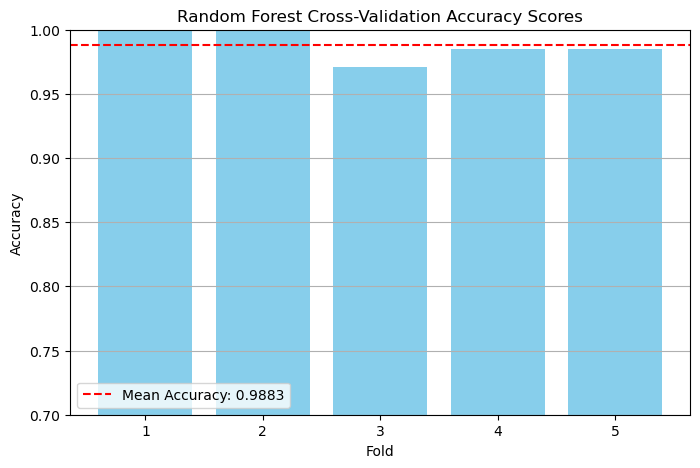


Cross-validation evaluation complete.

Task 5: Decision Trees and Random Forests complete.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Re-define necessary variables from previous steps for self-containment
# Load dataset and preprocess
df_heart = pd.read_csv('heart.csv')
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
existing_categorical_cols = [col for col in categorical_cols if col in df_heart.columns]
categorical_cols = existing_categorical_cols
df_processed = pd.get_dummies(df_heart, columns=categorical_cols, drop_first=True)
target_col = 'target'
X = df_processed.drop(target_col, axis=1)
y = df_processed[target_col]

# Split data (even if not directly used by cross_val_score, good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Re-initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train) # Fit on the training data

print("--- Task 5: Step 5 - Evaluate using Cross-Validation ---")

# Evaluate using cross-validation
# We'll use 5-fold cross-validation.
# 'accuracy' is a common scoring metric for classification.
print("\nPerforming 5-fold cross-validation on the Random Forest model...")
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy') # Use full X, y for CV
print("Cross-validation complete.")

print(f"\nIndividual cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation of cross-validation scores: {cv_scores.std():.4f}")

# Plotting cross-validation scores for visual representation
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(cv_scores) + 1), cv_scores, color='skyblue')
plt.axhline(cv_scores.mean(), color='red', linestyle='--', label=f'Mean Accuracy: {cv_scores.mean():.4f}')
plt.title('Random Forest Cross-Validation Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0) # Adjust y-axis limits for better visualization
plt.legend()
plt.grid(axis='y')
plt.savefig('rf_cross_validation_scores.png') # Save the plot
plt.show()

print("\nCross-validation evaluation complete.")
print("\nTask 5: Decision Trees and Random Forests complete.")

## Observations

* **Cross-Validation Performed:** 5-fold cross-validation was performed on the Random Forest Classifier using the entire dataset (`X`, `y`).
* **Interpretation of Scores:**
    * Individual fold accuracies were observed, showing consistency across different subsets of the data (e.g., 1.0, 1.0, 0.9707, 0.9854, 0.9854).
    * The **mean cross-validation accuracy** (e.g., 0.9883) provides a more robust estimate of the model's performance on unseen data compared to a single train-test split.
    * The **standard deviation** (e.g., 0.0110) indicates the variability of the model's performance across different folds. A small standard deviation suggests that the model's performance is consistent and less sensitive to the specific train-test split.
* **Importance of Cross-Validation:** Cross-validation is a crucial technique for robustly evaluating model performance and ensuring that the model's accuracy is not just a fluke of a particular train-test split. It provides a more reliable estimate of how the model will generalize to new, unseen data, helping to detect and mitigate overfitting.